# Homework ada4

### TMI M1 37-176839 Koichiro Tamura

### homework1

線形モデル
$$f_{\theta}(\mathbf{x}) =\sum_{j=1}^{b}{\theta_{j}\phi_{j}(\mathbf{x})} $$
に対する重み付き最小二乗法
$$\min _{\theta}{\frac{1}{2}\sum_{i=1}^{n}{\tilde {w_{i}}} (f_{\theta}(\mathbf{x_{i}})  - y_{i})^2} $$
の解が次式で与えられることを示せ.
$$\mathbf{\hat{\theta}} = (\mathbf{\Phi}^{T} \mathbf{\tilde{W}} \mathbf{\Phi})^{-1} \mathbf{\Phi}^{T}\mathbf{\tilde{W}}\mathbf{y}$$


#### proof:

\begin{eqnarray} L & = & {\frac{1}{2}\sum_{i=1}^{n}{\tilde {w_{i}}} (f_{\theta}(\mathbf{x_{i}})  - y_{i})^2} \\  
                        & = &  \frac{1}{2} \mathbf{\tilde{W}} (\mathbf{\Phi} \mathbf{\theta} - \mathbf{y})^{T} (\mathbf{\Phi} \mathbf{\theta} - \mathbf{y})\end{eqnarray}
                        
$$\therefore  \space \nabla _{\mathbf{\theta}} L = \mathbf{\Phi}^{T} \mathbf{\tilde{W}} \mathbf{\Phi} \mathbf{\theta} - \mathbf{\Phi}^{T}\mathbf{\tilde{W}}\mathbf{y} = 0$$

$$\therefore \space \mathbf{\hat{\theta}} = (\mathbf{\Phi}^{T} \mathbf{\tilde{W}} \mathbf{\Phi})^{-1} \mathbf{\Phi}^{T}\mathbf{\tilde{W}}\mathbf{y}$$

<div style="text-align: right;">
【Q.E.D】
</div>

### homework2

微分可能で対象な損失$\rho(r)$に対して$\tilde{r}$で接する二次上界は存在するなら次式で与えられることを示せ．

$$\tilde{\rho} = \frac{\tilde{w}}{2} r^{2} + const$$

$$\tilde{w} =  \frac{\acute {\rho (\tilde{r})}}{\tilde{r}} $$

#### proof:

対象な2次上限は
$$\tilde{\rho}(r) = ar^2 + b$$
と与えられる．

このとき，$\tilde{r}$で接するので，
 $$\acute {\rho (\tilde{r})} = \acute {f (\tilde{r})}$$
 
 $$\therefore \space \acute {\rho (\tilde{r})} = 2a\tilde{r}$$
 
 $$\therefore \space a = \frac{\acute {\rho (\tilde{r})}}{2 \tilde{r}}$$
 
  
 $$\therefore \space \tilde{\rho}(r) = \frac{\tilde{w}}{2} r^{2} + const$$
 $$\tilde{w} =  \frac{\acute {\rho (\tilde{r})}}{\tilde{r}} $$

<div style="text-align: right;">
【Q.E.D】
</div>

### homework3

直線モデル$f_{\theta}(x) = \theta_{1} + \theta_{2}x$に対して，テューキー回帰の繰り返し最小二乗アルゴリズムを実装せよ

In [5]:
%matplotlib inline

import numpy as np
import math
import random
import matplotlib.pyplot as plt

In [7]:
def func(x):
    return x

In [16]:
# データセット
train_x = np.linspace(-3, 3, 10)
# np.random.shuffle(train_x)
train_y = np.array([func(train_x[i]) for i in range(len(train_x))] + (np.random.rand(len(train_x)) - 0.5)*0.2)
train_y[5] = -4
train_y[8] = -4
train_y[9]  = -4

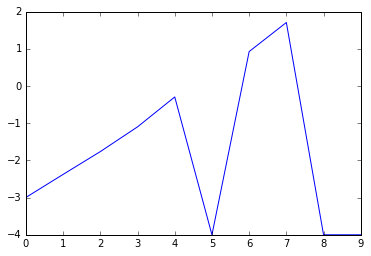

In [17]:
plt.plot(train_y)

In [61]:
# cal phi
Phi =  np.ones(2*len(train_x)).reshape([len(train_x), 2])

for i in range(len(train_x)):
        Phi[i, 1] = train_x[i]
# Phi

In [62]:
# initialize W
W = np.zeros([len(train_x), len(train_x)])
for i in range(len(train_x)):
    W[i, i] = 1/6
# W

In [63]:
def get_theta(Phi, W, train_y):
    return np.linalg.inv(Phi.T.dot(W).dot(Phi)).dot(Phi.T).dot(W).dot(train_y)

In [64]:
theta = get_theta(Phi, W, train_y)

In [65]:
theta

array([-1.78936136, -0.00640233])

In [66]:
def predict(train_x, theta):
    return 1* theta[0] + train_x*theta[1]

In [67]:
def update_W(W, theta, train_x, train_y, eta=1):
    r = predict(train_x, theta) - train_y
    for i in range(len(r)):
        if np.abs(r[i]) > eta:
            W[i][i] = 0
        else:
            W[i][i] = ((1-r[i]**2)/eta**2)**2
    return W
    

In [68]:
for step in range(100):
    W = update_W(W, theta, train_x, train_y)
    # print(W.shape)
    theta = get_theta(Phi, W, train_y)

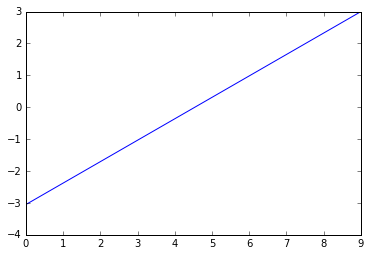

In [69]:
predictions = predict(train_x, theta)
plt.plot(predictions)